# Explore the OpenCharts API

In this notebook you will find out what information can be obtained from the OpenCharts API and the basics on how to download an image.

## List all the available products

The common part of all the links to download open charts in **api_url** variable:

In [1]:
api_url = "https://apps.ecmwf.int/webapps/opencharts-api/v1/"

And the link to download the information about **all the layers** can be constructed like this.  
Let's print it:

In [2]:
print('{}packages/opencharts/products/'.format(api_url))

https://apps.ecmwf.int/webapps/opencharts-api/v1/packages/opencharts/products/


Let's download it and print here.

In [3]:
import requests

result =requests.get('{}packages/opencharts/products/'.format(api_url))

all_data = result.json()

This has returned us a big json structure with the definitions of all the products from OpenCharts.  
If you click on the printed link you will get the same structure in the new tab.  
Let's see here what it looks like:

In [4]:
all_data

{'subtitle': 'opencharts',
 'description': 'Graphical products catalogue of ECMWF medium/extended/long range products that are presented with verification results. Depending on the user access right, some of medium range charts are clickable that produce Meteograms when clicked',
 'title': 'Charts catalogue',
 'facets': {'Range': ['Medium (15 days)',
   'Extended (42 days)',
   'Long (Months)'],
  'Type': ['Forecasts', 'Verification'],
  'Component': ['Surface', 'Atmosphere'],
  'Product type': ['High resolution forecast (HRES)',
   'Ensemble forecast (ENS)',
   'Combined (ENS + HRES)',
   'Extreme forecast index',
   'Point-based products'],
  'Parameters': ['Wind',
   'Mean sea level pressure',
   'Temperature',
   'Geopotential',
   'Precipitation',
   'Cloud',
   'Water vapour',
   'Indices',
   'Ocean waves',
   'Surface characteristics',
   'Snow',
   'Tropical cyclones']},
 'tracker': 'tracker-24921ef8a0dc4a49b0df9eddae3d72e2',
 'products': [{'subtitle': ['High resolution foreca

It is one big dictionary. Let's list its keys:

In [5]:
all_data.keys()

dict_keys(['subtitle', 'description', 'title', 'facets', 'tracker', 'products', 'uid', 'name'])

Under **data['facets']** we can read the possible values of some of the parameters that we can use for filtering.  
For example, we can see which values for 'Range'  or 'Product type' are there.

In [6]:
all_data['facets']

{'Range': ['Medium (15 days)', 'Extended (42 days)', 'Long (Months)'],
 'Type': ['Forecasts', 'Verification'],
 'Component': ['Surface', 'Atmosphere'],
 'Product type': ['High resolution forecast (HRES)',
  'Ensemble forecast (ENS)',
  'Combined (ENS + HRES)',
  'Extreme forecast index',
  'Point-based products'],
 'Parameters': ['Wind',
  'Mean sea level pressure',
  'Temperature',
  'Geopotential',
  'Precipitation',
  'Cloud',
  'Water vapour',
  'Indices',
  'Ocean waves',
  'Surface characteristics',
  'Snow',
  'Tropical cyclones']}

All the products are defined under the key 'products'. It containts a list of definitions for each product.  
Let's list all the product names first, before fltering.

In [7]:
products = []
for product in all_data["products"] :
    products.append(product["name"])
print (products)

['medium-mslp-wind850', 'medium-z500-t850', 'medium-2mt-wind30', 'medium-mslp-wind200', 'medium-mslp-rain', 'medium-clouds', 'medium-rv-div-uv', 'medium-simulated-ir', 'medium-simulated-wv', 'medium-t-z', 'medium-2t-wind', 'medium-uv-z', 'medium-uv-rh', 'medium-thickness-mslp', 'medium-indices', 'medium-swh-mwd', 'medium-tssh-mwd', 'medium-wwsh-mwd', 'medium-mwp-mwd', 'medium-mwpts-mwd', 'medium-mwpww-mwd', 'medium-albedo', 'medium-orography', 'medium-lai', 'medium-snow-sic', 'w_sst', 'w_soil_moisture', 'pincr', 'medium-mslp-mean-spread', 'plot_ensm_essential', 'medium-multi-efi', 'efi2web_2t', 'efi2web_2tmin', 'efi2web_2tmax', 'efi2web_10fg', 'efi2web_10ff', 'efi2web_tp', 'efi2web_hsttmax', 'efi2web_sf', 'efi2web_cape', 'efi2web_capeshear', 'efi2web_wvf', 'medium-trajectories', 'pb_tpr', 'medium-2t-probability', 'medium-10m-probability', 'medium-wg-probability', 'medium-tp-probability', 'medium-swh-probability', 'medium-mwp-probability', 'medium-2t-long-probability', 'medium-tp-long-p

Ok this list is nice, but how do we know what name corresponds to which product?  

Some documentation is available in the SwaggerUI documentation.  
Run the next cell, choose the product from the list and you will get the link for this parameter.

In [8]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(
    product1 = widgets.Dropdown(
    options= products,
    
    description='Product:',
    disabled=False,
))
def product_is(product1):
    to_print =  "To learn more about the parameters, a documentation is available at {}swagger-ui/?product={}&package=opencharts".format(api_url, product1) 
    return to_print

interactive(children=(Dropdown(description='Product:', options=('medium-mslp-wind850', 'medium-z500-t850', 'me…

Let's print a random product to see the structure.

In [9]:
all_data['products'][10]

{'subtitle': ['High resolution forecast'],
 'description': '2 m temperature and 10m wind',
 'package': 'medium',
 'title': '2m temperature and 10m wind',
 'group': 'High resolution forecast',
 'opencharts': True,
 'thumbnail': 'https://apps.ecmwf.int/webapps/opencharts-api/backend/get-product-thumbnail/medium-2t-wind/?width=512&mode=expand&projection=europe',
 'tags': {'Product group': ['High resolution forecast'],
  'Parameters': ['Temperature'],
  'Component': ['Surface'],
  'Range': ['Medium (15 days)'],
  'Product type': ['High resolution forecast (HRES)'],
  'Type': ['Forecasts']},
 'name': 'medium-2t-wind'}

## Print filtered products and their title

Our random product from the list had these tags associated with it:

In [10]:
all_data['products'][10]['tags']

{'Product group': ['High resolution forecast'],
 'Parameters': ['Temperature'],
 'Component': ['Surface'],
 'Range': ['Medium (15 days)'],
 'Product type': ['High resolution forecast (HRES)'],
 'Type': ['Forecasts']}

We can filter the products by tags, 'Range' to list all the products from Extended range for example.  
Note that not all the products have the 'Range' tag, so here we print only those that do have it and have the value as Extended (42 days).

In [11]:
for product in all_data['products']:
    if ('Range' in product['tags']) and (product['tags']['Range'][0] == 'Extended (42 days)'):
        print('{} parameter is {}'.format(product['name'],product['title']) )

extended-anomaly-2t parameter is 2m temperature: Weekly mean anomalies
extended-anomaly-t parameter is Surface temperature: Weekly mean anomalies
extended-anomaly-tp parameter is Precipitation: Weekly mean anomalies
extended-anomaly-mslp parameter is Mean sea level pressure: Weekly mean anomalies
extended-anomaly-multi-param parameter is Multiparam: Weekly mean anomalies
extended-anomaly-z500 parameter is 500 hPa Z: Weekly mean anomalies
extended-pdist-2t parameter is 2m temperature: Probability distribution
extended-pdist-mslp parameter is Mean sea level pressure: Probability distribution
extended-pdist-rain parameter is Precipitation: Probability distribution
extended-pdist-t parameter is Surface temperature: Probability distribution
extended-prob-anom-2t parameter is 2m temperature: Probability of weekly anomaly > 0
extended-prob-anom-tp parameter is Precipitation: Probability of weekly anomaly > 0
extended-prob-anom-t parameter is Surface temperature: Probability of weekly anomaly 

Or we can see which meteorological parameters do our products have.  
We list here only the products that have more than 1 parameter tagged.

In [12]:
for product in all_data['products']:
    if ('Parameters' in product['tags']) and len(product['tags']['Parameters']) > 1:
        print('{} product has parameters: {}'.format(product['name'], str(product['tags']['Parameters'])))

medium-mslp-wind850 product has parameters: ['Wind', 'Mean sea level pressure']
medium-z500-t850 product has parameters: ['Temperature', 'Geopotential']
medium-2mt-wind30 product has parameters: ['Temperature', 'Wind']
medium-mslp-wind200 product has parameters: ['Mean sea level pressure', 'Wind']
medium-mslp-rain product has parameters: ['Precipitation', 'Mean sea level pressure']
medium-clouds product has parameters: ['Cloud', 'Mean sea level pressure']
medium-t-z product has parameters: ['Temperature', 'Geopotential']
medium-uv-z product has parameters: ['Wind', 'Geopotential']
medium-uv-rh product has parameters: ['Wind', 'Water vapour']
medium-thickness-mslp product has parameters: ['Mean sea level pressure', 'Geopotential']
pincr product has parameters: ['Wind', 'Geopotential']
plot_ensm_essential product has parameters: ['Mean sea level pressure', 'Temperature', 'Wind', 'Geopotential']
medium-multi-efi product has parameters: ['Wind', 'Precipitation', 'Mean sea level pressure', 

## Individual products

All previous exploration was on the list of all products.  

However, in order to get the image we need to get the data from the API for the individual product.

In [13]:
@interact(
    product = widgets.Dropdown(
    options= products,
    
    description='Product:',
    disabled=False,
))
def product_is(product):
    get = '{}/products/{}/'.format(api_url, product)
    
    result = requests.get(get)
    
    data = result.json()
    
    return data

interactive(children=(Dropdown(description='Product:', options=('medium-mslp-wind850', 'medium-z500-t850', 'me…

We can now see that the link to the png image of the procut is under **data['data']['link']['href']**

In [14]:
product = 'medium-z500-t850'
data = product_is(product)

data["data"]["link"]["href"]

'https://apps.ecmwf.int/webapps/opencharts/content/20210914105327-21698f3b9c6d74ced4aa5c1f9e3c9471746ca436.png'

Finally we can see the image in the link using display fucntion.

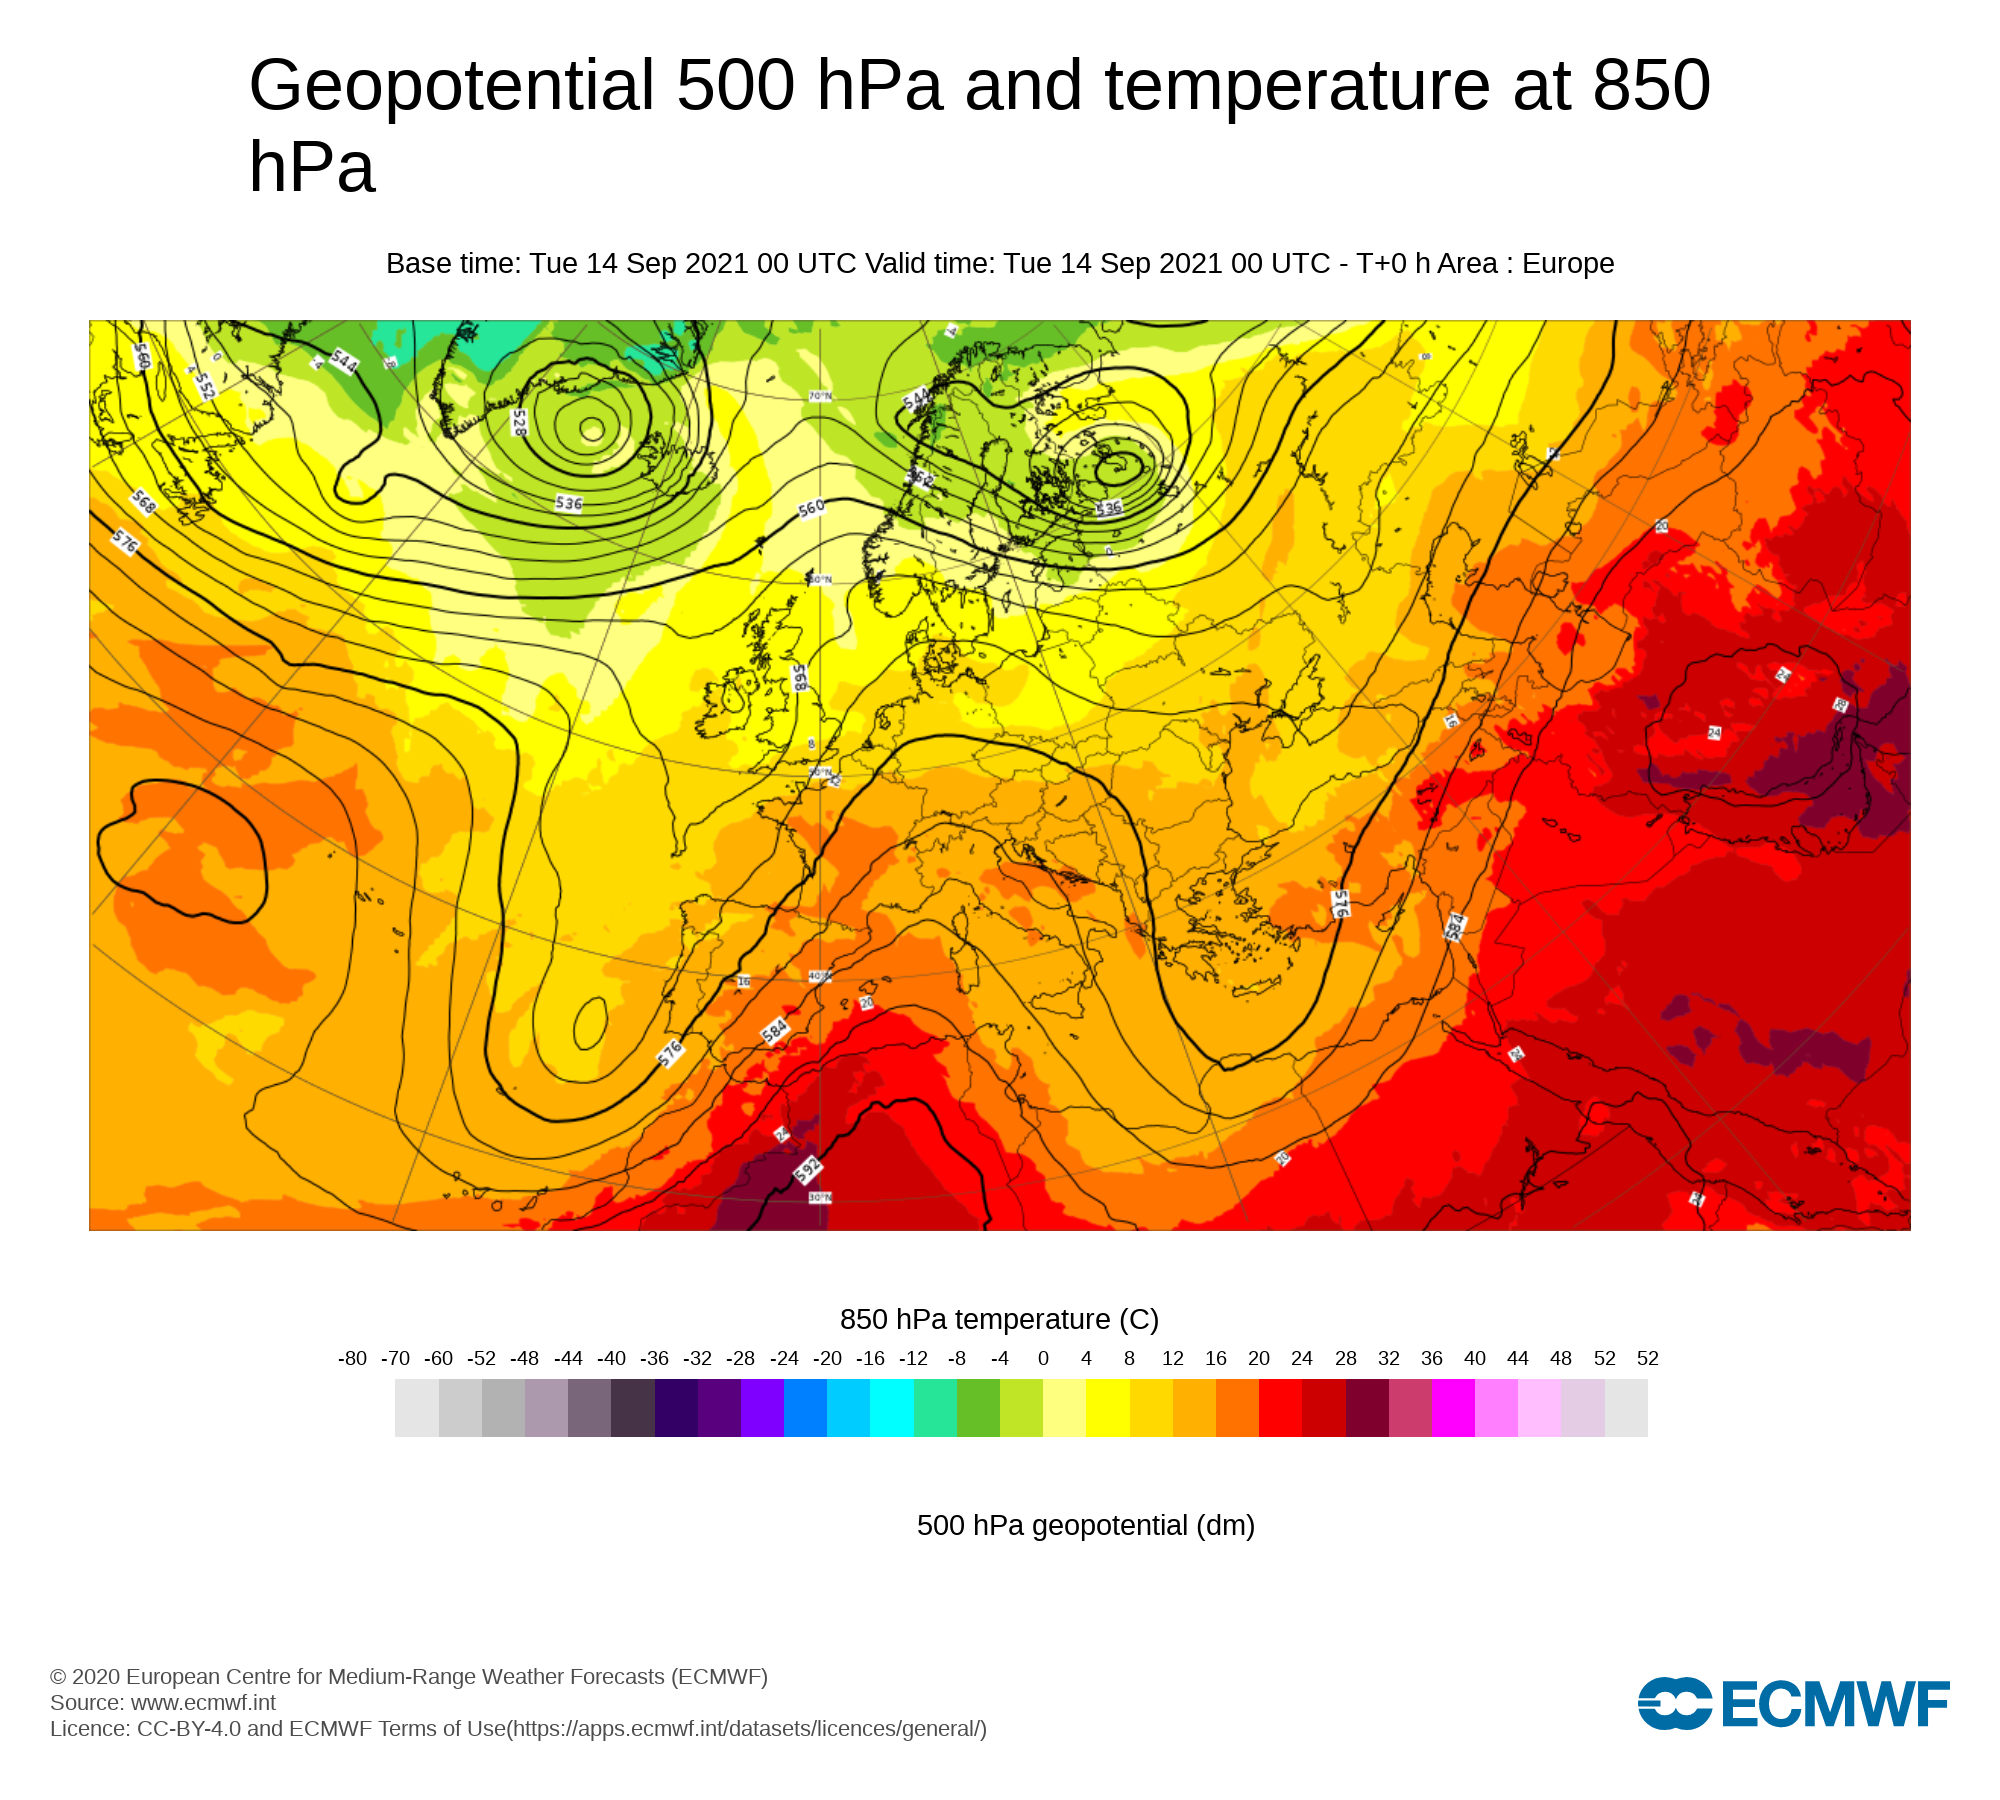

In [15]:
from IPython import display
display.Image(data["data"]["link"]["href"])

This has given us the image of the default time and area for this product.  
Please check the other notebooks in this series to learn how to download products for a particular date and step and for specific area, or how to get the image as pdf file.